In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

In [5]:
df_data = pd.read_csv('blog_vid_5_new.csv')

In [6]:
df = df_data[df_data['reply_count'] > 0]

In [7]:
df['index'] = pd.to_numeric(df['index'], errors='coerce')

/var/folders/00/4_gxgzyx7131tsyx_ymz0hsm0000gn/T/ipykernel_37142/1128875700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index'] = pd.to_numeric(df['index'], errors='coerce')


In [8]:
df.dropna(subset=['index'], inplace=True)

/var/folders/00/4_gxgzyx7131tsyx_ymz0hsm0000gn/T/ipykernel_37142/663942010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['index'], inplace=True)


In [9]:
df = df.reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7838 non-null   object 
 1   author_name  7838 non-null   object 
 2   text         7838 non-null   object 
 3   reply_count  7838 non-null   float64
 4   top_level    7838 non-null   object 
 5   index        7838 non-null   float64
 6   publishedAt  7838 non-null   object 
 7   updateAt     7838 non-null   object 
 8   likeCount    7838 non-null   float64
dtypes: float64(3), object(6)
memory usage: 551.2+ KB


 #### Тип данных комментария

In [11]:
df['text'] = df['text'].astype(str)
df['initial_comment'] = df['text']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7838 non-null   object 
 1   author_name      7838 non-null   object 
 2   text             7838 non-null   object 
 3   reply_count      7838 non-null   float64
 4   top_level        7838 non-null   object 
 5   index            7838 non-null   float64
 6   publishedAt      7838 non-null   object 
 7   updateAt         7838 non-null   object 
 8   likeCount        7838 non-null   float64
 9   initial_comment  7838 non-null   object 
dtypes: float64(3), object(7)
memory usage: 612.5+ KB


In [13]:
train_corpus = df['text']

In [14]:
train_corpus

0       Господи, какие же слабые люди) \nДа и много я ...
1       Какое вообще значение имеет, когда она уехала ...
2       Очень много говорит о свободе уехавшие. У меня...
3       Если высказывания без конкретных оскорблений, ...
4       Меня всегда поражает Юрий Дудь, он говорит про...
                              ...                        
7833                       @@sanyaZakonебать «величайшая»
7834                                      Из лесу вышел?)
7835    @@donpedro290 для тебя получается все из Леса ...
7836    Юр, мы за Украину, желаем ей победы в войне и ...
7837    Кто мы то, ты здесь один. Нет, теперь ты будеш...
Name: text, Length: 7838, dtype: object

In [15]:
comment_lengths = train_corpus.apply(len)

In [16]:
df['length'] = comment_lengths

In [17]:
#pip install emoji

In [18]:
import emoji

def count_emojis(comment):
    emoji_count = sum(1 for token in comment if emoji.emoji_count(token))
    return emoji_count

def count_emojis_in_comments(tokenized_comments):
    emoji_counts = []
    for comment in tokenized_comments:
        emoji_count = count_emojis(comment)
        emoji_counts.append(emoji_count)
    return emoji_counts


emoji_counts = count_emojis_in_comments(train_corpus)

df['emoji_count'] = emoji_counts


## Токенизация и предобработка комментариев 

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
stop_words.extend(['br', 'її', 'quot', 'www', 'href', 'https', 'http', 'ru', '\n'])
stop_words.extend(stopwords.words('english'))

In [20]:
#pip install spacy

In [21]:
import spacy
from gensim.utils import simple_preprocess
nlp = spacy.load("ru_core_news_sm")

def lemma(word):
    for w in nlp(word):
        return w.lemma_
def process_words(texts):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    for sent in texts:
        texts_out.append([lemma(token) for token in sent])
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

def preprocess(comment):
    # Tokenize and lemmatize
    tokens = [token.lemma_ for token in nlp(comment)]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    return ' '.join(tokens).replace('\n', ' ')


In [22]:
tokenized_text = [word_tokenize(tok) for tok in train_corpus]

In [23]:
import string

def calculate_punctuation_percentage(comment):
    total_chars = len(comment)
    punctuation_count = sum(1 for char in comment if char in string.punctuation)
    return (punctuation_count / total_chars) if total_chars > 0 else 0

def calculate_punctuation_percentages(tokenized_comments):
    percentages = []
    for comment in tokenized_comments:
        punctuation_percentage = calculate_punctuation_percentage(comment)
        percentages.append(punctuation_percentage)
    return percentages

In [24]:
punctuation_percentages = calculate_punctuation_percentages(tokenized_text)

df['punct_perc'] = punctuation_percentages
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7838 non-null   object 
 1   author_name      7838 non-null   object 
 2   text             7838 non-null   object 
 3   reply_count      7838 non-null   float64
 4   top_level        7838 non-null   object 
 5   index            7838 non-null   float64
 6   publishedAt      7838 non-null   object 
 7   updateAt         7838 non-null   object 
 8   likeCount        7838 non-null   float64
 9   initial_comment  7838 non-null   object 
 10  length           7838 non-null   int64  
 11  emoji_count      7838 non-null   int64  
 12  punct_perc       7838 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 796.2+ KB


In [25]:
tokenized_text

[['Господи',
  ',',
  'какие',
  'же',
  'слабые',
  'люди',
  ')',
  'Да',
  'и',
  'много',
  'я',
  'таких',
  'знаю',
  ',',
  'кто',
  '«',
  'против',
  'войны',
  ',',
  'понимали',
  ',',
  'что',
  'жить',
  'тут',
  'не',
  'сможем',
  'больше',
  '»',
  ',',
  'но',
  'уехали',
  'они',
  'почему-то',
  'только',
  'с',
  'началом',
  'мобилизации',
  ')',
  'Срут',
  'в',
  'уши',
  ',',
  'а',
  'вы',
  'и',
  'рады',
  'Против',
  'войны',
  '?',
  'Хорошо',
  ',',
  '24',
  'февраля',
  '2022',
  'собрала',
  'вещи',
  ',',
  '25',
  'уехала',
  ',',
  'можешь',
  'поехать',
  'на',
  'Украину',
  'и',
  'помогать',
  'там',
  ',',
  'можешь',
  'абстрагироваться',
  'и',
  'не',
  'касаться',
  'этой',
  'темы',
  ',',
  'спокойно',
  'жить',
  'за',
  'рубежом',
  ',',
  'а',
  'можешь',
  'остаться',
  'в',
  'РФ',
  ',',
  'но',
  'не',
  'заливать',
  'потом',
  ',',
  'о',
  'том',
  ',',
  'как',
  'ты',
  'хотела',
  'с',
  'самого',
  'начала',
  'уехать'],
 ['К

In [26]:
#data_ready = process_words(tokenized_text)

In [27]:
import pickle

# Save the list of lists to a file
#with open('data.pkl', 'wb') as f:
#    pickle.dump(data_ready, f)


In [28]:
# Load the list of lists from the file
with open('data.pkl', 'rb') as f:
    data_ready = pickle.load(f)

In [29]:
print(data_ready)

[['господь', 'слабый', 'человек', 'знать', 'против', 'война', 'понимать', 'жить', 'смочь', 'уехать', 'почему', 'начало', 'мобилизация', 'срут', 'ухо', 'рад', 'против', 'война', 'февраль', 'собрать', 'вещь', 'уехать', 'мочь', 'поехать', 'украина', 'помогать', 'мочь', 'касаться', 'тема', 'спокойно', 'жить', 'рубеж', 'мочь', 'остаться', 'рф', 'заливать', 'хотеть', 'самого', 'начать', 'уехать'], ['вообще', 'значение', 'иметь', 'уехать', 'уехать', 'вообще', 'позиция', 'понятный', 'самого', 'начать'], ['очень', 'говорить', 'свобода', 'уехать', 'вопрос', 'свобода', 'это', 'сидеть', 'страна', 'поливать', 'свой', 'президент', 'думать', 'каждый', 'гражданин', 'германия', 'сша', 'открыть', 'вести', 'против', 'свой', 'страна', 'свой', 'президент', 'сидеть', 'свой', 'страна', 'устраивать', 'демонстрация', 'писать', 'лозунг', 'пост', 'пройти', 'это', 'безнаказанно', 'думать', 'знать', 'пример', 'например', 'россия', 'год', 'судно', 'высказывание', 'сеть', 'америка', 'судно', 'срок', 'давать', 'малый

In [30]:
#import json

#data = {"text": f"{data_ready}"}

#with open("data2.json", "w") as file:
#    json.dump(data, file)

In [31]:
#with open("data.json", "r") as file:
#    data = json.load(file)
#    text_data = data["text"]

In [32]:
#data_ready = json.loads("[['one'], ['one']]")

In [33]:
#with open('my_list_file2.py', 'w') as file:
#    file.write(f'my_list = {data_ready}')

In [34]:
#file.close()

In [35]:
#from my_list_file import my_list

In [36]:
df['text'] = data_ready 
#df['text'] = my_list_file.my_list

In [37]:
len(df['text'][0])

40

In [38]:
df_filtered = df[df['text'].apply(lambda x: len(x)>0)]
df_filtered = df_filtered.reset_index(drop=True)

In [39]:
#df_filtered['publishedAt'] = pd.to_datetime(df_filtered['publishedAt'])
#end_time = '2024-01-07T23:59:59Z'

In [40]:
#filtered_data = df_filtered[(df_filtered['publishedAt'] <= end_time)]

In [41]:
#filtered_data.info()

In [42]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7710 entries, 0 to 7709
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7710 non-null   object 
 1   author_name      7710 non-null   object 
 2   text             7710 non-null   object 
 3   reply_count      7710 non-null   float64
 4   top_level        7710 non-null   object 
 5   index            7710 non-null   float64
 6   publishedAt      7710 non-null   object 
 7   updateAt         7710 non-null   object 
 8   likeCount        7710 non-null   float64
 9   initial_comment  7710 non-null   object 
 10  length           7710 non-null   int64  
 11  emoji_count      7710 non-null   int64  
 12  punct_perc       7710 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 783.2+ KB


In [43]:
df_filtered['top_level'] = df_filtered['top_level'].astype(int)

Получили окончательный датасет, на основе которого будем обучать модель

Отсеим ветки, в которых не осталось основного комментария

In [44]:
filtered_idxs = df_filtered[df_filtered['top_level'] == 0]['index'].unique()

In [45]:
df_filtered = df_filtered[df_filtered['index'].isin(filtered_idxs)]
df_filtered = df_filtered.reset_index(drop=True)

In [46]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7706 entries, 0 to 7705
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7706 non-null   object 
 1   author_name      7706 non-null   object 
 2   text             7706 non-null   object 
 3   reply_count      7706 non-null   float64
 4   top_level        7706 non-null   int64  
 5   index            7706 non-null   float64
 6   publishedAt      7706 non-null   object 
 7   updateAt         7706 non-null   object 
 8   likeCount        7706 non-null   float64
 9   initial_comment  7706 non-null   object 
 10  length           7706 non-null   int64  
 11  emoji_count      7706 non-null   int64  
 12  punct_perc       7706 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 782.8+ KB


Отсеим ветки, в которых остался только один комментарий, причем нам не важно, основной это комментрий или нет, так как до этого мы отсеили все ветки, в которых отсутствует основной комментарий, значит если комментариев два или более, один из них основной

In [47]:
df_filtered = df_filtered[df_filtered.groupby('index')['index'].transform('count') > 1]
df_filtered = df_filtered.reset_index(drop=True)

In [48]:
df_filtered.info() #RangeIndex: 7583 entries, 0 to 7582

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7657 non-null   object 
 1   author_name      7657 non-null   object 
 2   text             7657 non-null   object 
 3   reply_count      7657 non-null   float64
 4   top_level        7657 non-null   int64  
 5   index            7657 non-null   float64
 6   publishedAt      7657 non-null   object 
 7   updateAt         7657 non-null   object 
 8   likeCount        7657 non-null   float64
 9   initial_comment  7657 non-null   object 
 10  length           7657 non-null   int64  
 11  emoji_count      7657 non-null   int64  
 12  punct_perc       7657 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 777.8+ KB


In [49]:
df_filtered = df_filtered.reset_index(drop=True)

In [50]:
df_filtered['index'] = df_filtered['index'].astype(int)

In [51]:
thread_idxs = df_filtered['index'].unique()
thread_idxs

array([  13,   38,   65, ..., 8326, 8341, 8344])

In [52]:
df_filtered[df_filtered['index'] == 146]

,Unnamed: 0,author_name,text,reply_count,top_level,index,publishedAt,updateAt,likeCount,initial_comment,length,emoji_count,punct_perc


In [53]:
len(thread_idxs)

1894

In [54]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

In [55]:
#df_filtered = pd.read_csv('output_vid_5.csv')

In [56]:
list(thread_idxs)

[13,
 38,
 65,
 71,
 79,
 99,
 109,
 147,
 185,
 188,
 197,
 206,
 220,
 221,
 226,
 234,
 239,
 242,
 247,
 250,
 260,
 261,
 262,
 267,
 274,
 277,
 280,
 283,
 285,
 286,
 290,
 302,
 305,
 313,
 317,
 324,
 339,
 341,
 346,
 349,
 356,
 357,
 362,
 371,
 372,
 384,
 395,
 401,
 413,
 424,
 425,
 434,
 438,
 455,
 456,
 459,
 464,
 477,
 483,
 488,
 490,
 491,
 493,
 494,
 508,
 511,
 512,
 515,
 521,
 531,
 534,
 535,
 536,
 545,
 547,
 550,
 552,
 555,
 561,
 562,
 568,
 583,
 588,
 597,
 598,
 609,
 627,
 640,
 649,
 652,
 653,
 656,
 663,
 665,
 669,
 675,
 685,
 691,
 692,
 699,
 703,
 722,
 724,
 726,
 730,
 732,
 733,
 735,
 737,
 739,
 740,
 744,
 746,
 748,
 751,
 758,
 760,
 764,
 765,
 769,
 770,
 777,
 779,
 787,
 790,
 796,
 802,
 805,
 806,
 809,
 815,
 821,
 823,
 828,
 829,
 830,
 831,
 834,
 840,
 844,
 846,
 847,
 852,
 854,
 860,
 861,
 863,
 867,
 871,
 873,
 880,
 897,
 901,
 903,
 905,
 908,
 910,
 914,
 916,
 918,
 919,
 928,
 930,
 937,
 939,
 940,
 941,
 952

In [57]:
thread2idx_list = []
for thread_idx in thread_idxs:
    print(df_filtered[df_filtered['index']==thread_idx][['index']])
    idxs_list = list(df_filtered[df_filtered['index']==thread_idx].index)
    thread2idx_list.append(idxs_list)

   index
0     13
1     13
   index
2     38
3     38
   index
4     65
5     65
   index
6     71
7     71
8     71
    index
9      79
10     79
    index
11     99
12     99
    index
13    109
14    109
    index
15    147
16    147
    index
17    185
18    185
19    185
    index
20    188
21    188
    index
22    197
23    197
    index
24    206
25    206
    index
26    220
27    220
    index
28    221
29    221
30    221
31    221
    index
32    226
33    226
    index
34    234
35    234
36    234
37    234
38    234
39    234
40    234
    index
41    239
42    239
43    239
44    239
    index
45    242
46    242
    index
47    247
48    247
    index
49    250
50    250
    index
51    260
52    260
    index
53    261
54    261
    index
55    262
56    262
    index
57    267
58    267
59    267
60    267
    index
61    274
62    274
63    274
64    274
    index
65    277
66    277
    index
67    280
68    280
69    280
    index
70    283
71    283
72    283
   

     index
878   1269
879   1269
880   1269
881   1269
882   1269
883   1269
884   1269
     index
885   1270
886   1270
     index
887   1271
888   1271
     index
889   1276
890   1276
891   1276
     index
892   1279
893   1279
     index
894   1286
895   1286
     index
896   1293
897   1293
898   1293
899   1293
900   1293
     index
901   1297
902   1297
903   1297
904   1297
     index
905   1331
906   1331
     index
907   1335
908   1335
     index
909   1336
910   1336
911   1336
912   1336
     index
913   1340
914   1340
     index
915   1341
916   1341
     index
917   1343
918   1343
     index
919   1349
920   1349
     index
921   1350
922   1350
     index
923   1354
924   1354
     index
925   1355
926   1355
927   1355
928   1355
     index
929   1358
930   1358
     index
931   1361
932   1361
     index
933   1362
934   1362
935   1362
936   1362
937   1362
938   1362
939   1362
     index
940   1364
941   1364
942   1364
943   1364
944   1364
945   1364
946   1364

      index
1441   1808
1442   1808
1443   1808
      index
1444   1809
1445   1809
1446   1809
      index
1447   1810
1448   1810
      index
1449   1811
1450   1811
1451   1811
1452   1811
      index
1453   1813
1454   1813
1455   1813
1456   1813
1457   1813
      index
1458   1814
1459   1814
      index
1460   1818
1461   1818
1462   1818
      index
1463   1823
1464   1823
      index
1465   1824
1466   1824
1467   1824
1468   1824
1469   1824
1470   1824
      index
1471   1825
1472   1825
      index
1473   1826
1474   1826
      index
1475   1828
1476   1828
      index
1477   1829
1478   1829
      index
1479   1840
1480   1840
1481   1840
1482   1840
      index
1483   1842
1484   1842
1485   1842
1486   1842
      index
1487   1851
1488   1851
1489   1851
      index
1490   1852
1491   1852
      index
1492   1858
1493   1858
1494   1858
1495   1858
1496   1858
1497   1858
      index
1498   1859
1499   1859
1500   1859
1501   1859
1502   1859
1503   1859
      index
1504

      index
2047   2387
2048   2387
      index
2049   2390
2050   2390
2051   2390
      index
2052   2391
2053   2391
      index
2054   2392
2055   2392
      index
2056   2393
2057   2393
2058   2393
2059   2393
      index
2060   2399
2061   2399
      index
2062   2405
2063   2405
2064   2405
      index
2065   2408
2066   2408
      index
2067   2414
2068   2414
      index
2069   2417
2070   2417
2071   2417
      index
2072   2427
2073   2427
      index
2074   2428
2075   2428
2076   2428
2077   2428
2078   2428
      index
2079   2430
2080   2430
2081   2430
      index
2082   2438
2083   2438
      index
2084   2445
2085   2445
2086   2445
      index
2087   2454
2088   2454
      index
2089   2460
2090   2460
      index
2091   2464
2092   2464
      index
2093   2465
2094   2465
      index
2095   2469
2096   2469
      index
2097   2470
2098   2470
      index
2099   2471
2100   2471
      index
2101   2479
2102   2479
      index
2103   2482
2104   2482
2105   2482
    

      index
2704   3168
2705   3168
      index
2706   3175
2707   3175
      index
2708   3179
2709   3179
2710   3179
2711   3179
2712   3179
2713   3179
2714   3179
2715   3179
2716   3179
2717   3179
2718   3179
      index
2719   3181
2720   3181
2721   3181
2722   3181
      index
2723   3184
2724   3184
2725   3184
2726   3184
2727   3184
      index
2728   3193
2729   3193
2730   3193
      index
2731   3198
2732   3198
2733   3198
2734   3198
      index
2735   3208
2736   3208
2737   3208
      index
2738   3213
2739   3213
      index
2740   3215
2741   3215
      index
2742   3216
2743   3216
      index
2744   3222
2745   3222
2746   3222
2747   3222
2748   3222
2749   3222
      index
2750   3236
2751   3236
      index
2752   3246
2753   3246
2754   3246
2755   3246
      index
2756   3250
2757   3250
2758   3250
2759   3250
2760   3250
2761   3250
2762   3250
2763   3250
      index
2764   3251
2765   3251
      index
2766   3254
2767   3254
      index
2768   3260
2769

      index
3329   3957
3330   3957
3331   3957
3332   3957
3333   3957
3334   3957
3335   3957
3336   3957
      index
3337   3973
3338   3973
      index
3339   3978
3340   3978
      index
3341   3980
3342   3980
      index
3343   3990
3344   3990
3345   3990
3346   3990
3347   3990
      index
3348   3994
3349   3994
3350   3994
      index
3351   3998
3352   3998
      index
3353   4002
3354   4002
      index
3355   4020
3356   4020
3357   4020
      index
3358   4033
3359   4033
3360   4033
3361   4033
3362   4033
3363   4033
      index
3364   4052
3365   4052
3366   4052
3367   4052
3368   4052
3369   4052
3370   4052
      index
3371   4054
3372   4054
      index
3373   4058
3374   4058
      index
3375   4059
3376   4059
3377   4059
3378   4059
3379   4059
      index
3380   4061
3381   4061
      index
3382   4066
3383   4066
      index
3384   4070
3385   4070
      index
3386   4071
3387   4071
3388   4071
      index
3389   4079
3390   4079
      index
3391   4082
3392

      index
4013   4909
4014   4909
4015   4909
      index
4016   4911
4017   4911
      index
4018   4930
4019   4930
4020   4930
4021   4930
      index
4022   4932
4023   4932
      index
4024   4935
4025   4935
4026   4935
4027   4935
      index
4028   4938
4029   4938
4030   4938
      index
4031   4945
4032   4945
4033   4945
4034   4945
      index
4035   4946
4036   4946
      index
4037   4957
4038   4957
4039   4957
4040   4957
4041   4957
4042   4957
4043   4957
4044   4957
4045   4957
      index
4046   4958
4047   4958
4048   4958
      index
4049   4959
4050   4959
4051   4959
4052   4959
4053   4959
      index
4054   4960
4055   4960
      index
4056   4961
4057   4961
4058   4961
4059   4961
4060   4961
      index
4061   4968
4062   4968
4063   4968
4064   4968
4065   4968
      index
4066   4971
4067   4971
4068   4971
4069   4971
4070   4971
4071   4971
4072   4971
4073   4971
4074   4971
      index
4075   4992
4076   4992
4077   4992
4078   4992
4079   4992
4080

      index
4720   5657
4721   5657
4722   5657
      index
4723   5659
4724   5659
4725   5659
4726   5659
4727   5659
4728   5659
4729   5659
4730   5659
4731   5659
4732   5659
4733   5659
4734   5659
4735   5659
4736   5659
4737   5659
4738   5659
      index
4739   5660
4740   5660
      index
4741   5667
4742   5667
4743   5667
      index
4744   5668
4745   5668
      index
4746   5670
4747   5670
4748   5670
      index
4749   5671
4750   5671
      index
4751   5677
4752   5677
      index
4753   5678
4754   5678
      index
4755   5694
4756   5694
      index
4757   5695
4758   5695
      index
4759   5696
4760   5696
4761   5696
      index
4762   5704
4763   5704
      index
4764   5709
4765   5709
4766   5709
4767   5709
4768   5709
      index
4769   5715
4770   5715
      index
4771   5720
4772   5720
4773   5720
      index
4774   5725
4775   5725
      index
4776   5732
4777   5732
4778   5732
4779   5732
4780   5732
      index
4781   5733
4782   5733
      index
4783

      index
5539   6502
5540   6502
      index
5541   6504
5542   6504
5543   6504
      index
5544   6517
5545   6517
5546   6517
      index
5547   6526
5548   6526
      index
5549   6532
5550   6532
5551   6532
5552   6532
5553   6532
      index
5554   6534
5555   6534
5556   6534
      index
5557   6535
5558   6535
5559   6535
      index
5560   6539
5561   6539
      index
5562   6540
5563   6540
      index
5564   6544
5565   6544
5566   6544
      index
5567   6545
5568   6545
5569   6545
      index
5570   6546
5571   6546
5572   6546
      index
5573   6554
5574   6554
5575   6554
5576   6554
      index
5577   6556
5578   6556
5579   6556
5580   6556
      index
5581   6560
5582   6560
      index
5583   6573
5584   6573
      index
5585   6576
5586   6576
5587   6576
5588   6576
5589   6576
      index
5590   6579
5591   6579
      index
5592   6581
5593   6581
      index
5594   6582
5595   6582
5596   6582
      index
5597   6593
5598   6593
      index
5599   6594
5600

      index
6295   7147
6296   7147
6297   7147
6298   7147
6299   7147
6300   7147
      index
6301   7156
6302   7156
      index
6303   7178
6304   7178
6305   7178
6306   7178
6307   7178
6308   7178
6309   7178
6310   7178
      index
6311   7180
6312   7180
6313   7180
6314   7180
6315   7180
      index
6316   7185
6317   7185
6318   7185
      index
6319   7190
6320   7190
6321   7190
6322   7190
6323   7190
      index
6324   7197
6325   7197
      index
6326   7198
6327   7198
      index
6328   7200
6329   7200
      index
6330   7203
6331   7203
      index
6332   7206
6333   7206
      index
6334   7207
6335   7207
      index
6336   7208
6337   7208
6338   7208
      index
6339   7212
6340   7212
      index
6341   7213
6342   7213
6343   7213
      index
6344   7218
6345   7218
6346   7218
6347   7218
      index
6348   7225
6349   7225
      index
6350   7227
6351   7227
      index
6352   7228
6353   7228
      index
6354   7232
6355   7232
      index
6356   7235
6357

      index
7297   8087
7298   8087
7299   8087
7300   8087
      index
7301   8091
7302   8091
7303   8091
      index
7304   8109
7305   8109
7306   8109
7307   8109
7308   8109
7309   8109
7310   8109
7311   8109
7312   8109
      index
7313   8119
7314   8119
7315   8119
7316   8119
7317   8119
      index
7318   8127
7319   8127
7320   8127
7321   8127
      index
7322   8144
7323   8144
      index
7324   8147
7325   8147
7326   8147
      index
7327   8150
7328   8150
7329   8150
      index
7330   8155
7331   8155
7332   8155
7333   8155
7334   8155
...     ...
7423   8155
7424   8155
7425   8155
7426   8155
7427   8155

[98 rows x 1 columns]
      index
7428   8157
7429   8157
7430   8157
      index
7431   8170
7432   8170
7433   8170
7434   8170
      index
7435   8171
7436   8171
7437   8171
7438   8171
7439   8171
7440   8171
7441   8171
7442   8171
7443   8171
7444   8171
7445   8171
7446   8171
      index
7447   8173
7448   8173
7449   8173
7450   8173
7451   8173
7452 

In [58]:
thread2idx_list[-4:]

[[7629, 7630, 7631, 7632, 7633, 7634],
 [7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644],
 [7645, 7646, 7647, 7648, 7649, 7650, 7651, 7652, 7653, 7654],
 [7655, 7656]]

In [59]:
comments_ready = list(df_filtered['text'])

In [60]:
comments_tf_idf = [' '.join(comment) for comment in comments_ready]

In [61]:
comments_initial_raw = list(df_filtered['initial_comment'])

In [62]:
comments_initial = [preprocess(comment) for comment in comments_initial_raw]

In [63]:
#data = {"comments": f"{comments_initial}"}
#
#with open("data_comm_init.json", "w") as file:
#    json.dump(data, file)

In [64]:
comments_initial

['господь , слабый человек ) знать , " против война , понимать , жить смочь " , уехать почему - начало мобилизация ) срут ухо , рад против война ? хороший , 24 февраль 2022 собрать вещь , 25 уехать , мочь поехать украина помогать , мочь абстрагироваться касаться тема , спокойно жить рубеж , мочь остаться рф , заливать , , хотеть самого начало уехать',
 'вообще значение иметь , уехать уехать вообще ? позиция понятный самого начало .',
 'очень говорить свобода уехавшие . вопрос свобода - это сидеть страна поливать свой свой президент ? думать , каждый гражданин германия сша мочь открыто вести против свой страна свой президент сидеть свой страна устраивать демонстрация , писать лозунг пост ? пройти это безнаказанно ? думать знать пример . например россия 2023 год 400 судно - высказывание сеть , америка - 3300 судно срок давать малый высказывание вольнодумие . свобода ?   начать германия режим поливать , например учить школа , нормы гендерные прививать , общий туалет девочка мальчик . дума

### TF-IDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(comments_tf_idf)

In [66]:
tfidf_matrix

<7657x16531 sparse matrix of type '<class 'numpy.float64'>'
	with 84243 stored elements in Compressed Sparse Row format>

In [67]:
tfidf_matrix[0, :]

<1x16531 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between comments
similarity_matrix_tf_idf = cosine_similarity(tfidf_matrix, tfidf_matrix)
idxs = [9, 10, 11, 12]
# Example: Similarity between the first and second comments
similarity_between_first_second = list(similarity_matrix_tf_idf[idxs[0], idxs[1:]])
similarity_between_first_second

[0.0, 0.0, 0.0]

## Обучение модели

#### Word2Vec

In [69]:
from gensim.models import Word2Vec

# Assuming `comments` is a list of tokenized comments
model = Word2Vec(comments_ready, vector_size=100, window=5, min_count=1, workers=4)

In [70]:
# Get the vector representation of a word
vector = model.wv['зрение']

# Find similar words
similar_words = model.wv.most_similar('варвар', topn=5)

In [71]:
similar_words

[('варя', 0.9993774890899658),
 ('интервью', 0.999369740486145),
 ('почему', 0.9993659853935242),
 ('очень', 0.9993597269058228),
 ('интересный', 0.9993515014648438)]

#### FastText

In [72]:
#pip install fasttext

In [73]:
import fasttext

# Load pre-trained FastText model for Russian
model_ft = fasttext.load_model('cc.ru.300.bin')

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

comment1_vector = model_ft.get_sentence_vector('Your first comment')
comment2_vector = model_ft.get_sentence_vector('Your second comment')
comment_vector = [comment1_vector, comment2_vector]
# Calculate cosine similarity between the vectors
similarity = cosine_similarity(comment_vector)

print(f"Cosine Similarity: {similarity[0]}")

Cosine Similarity: [1.         0.93313754]


#### Dostoevsky

In [75]:
#!pip install dostoevsky
#!pip install transformers sentencepiece --quiet

In [76]:
#pip install torch

In [77]:
#import torch
#from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [78]:
#model_checkpoint = 'cointegrated/rubert-tiny-toxicity'

In [79]:
#tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [80]:
#model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

In [81]:
'''if torch.cuda.is_available():
    model.cuda()
    
def text2toxicity(text, aggregate=True):
    """ Calculate toxicity of a text (if aggregate=True) or a vector of toxicity aspects (if aggregate=False)"""
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()
    if isinstance(text, str):
        proba = proba[0]
    if aggregate:
        return 1 - proba.T[0] * (1 - proba.T[-1])
    return proba

print(text2toxicity('я люблю нигеров', True))
# 0.9350118728093193

print(text2toxicity('я люблю нигеров', False))
# [0.9715758  0.0180863  0.0045551  0.00189755 0.9331106 ]

print(text2toxicity(['я люблю нигеров', 'я люблю африканцев'], True))
# [0.93501186 0.04156357]

print(text2toxicity(['я люблю нигеров', 'я люблю африканцев'], False))
# [[9.7157580e-01 1.8086294e-02 4.5550885e-03 1.8975559e-03 9.3311059e-01]
#  [9.9979788e-01 1.9048342e-04 1.5297388e-04 1.7452303e-04 4.1369814e-02]]
'''

'if torch.cuda.is_available():\n    model.cuda()\n    \ndef text2toxicity(text, aggregate=True):\n    """ Calculate toxicity of a text (if aggregate=True) or a vector of toxicity aspects (if aggregate=False)"""\n    with torch.no_grad():\n        inputs = tokenizer(text, return_tensors=\'pt\', truncation=True, padding=True).to(model.device)\n        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()\n    if isinstance(text, str):\n        proba = proba[0]\n    if aggregate:\n        return 1 - proba.T[0] * (1 - proba.T[-1])\n    return proba\n\nprint(text2toxicity(\'я люблю нигеров\', True))\n# 0.9350118728093193\n\nprint(text2toxicity(\'я люблю нигеров\', False))\n# [0.9715758  0.0180863  0.0045551  0.00189755 0.9331106 ]\n\nprint(text2toxicity([\'я люблю нигеров\', \'я люблю африканцев\'], True))\n# [0.93501186 0.04156357]\n\nprint(text2toxicity([\'я люблю нигеров\', \'я люблю африканцев\'], False))\n# [[9.7157580e-01 1.8086294e-02 4.5550885e-03 1.8975559e-03 9.3311059e-01]\

In [82]:
#toxicity_matrix = [text2toxicity(comment) for comment in comments_initial_raw]

In [83]:
#toxicity_matrix

In [84]:
#with open('my_list_file1.py', 'w') as file:
#    file.write(f'my_list1 = {toxicity_matrix}')

In [85]:
#from dostoevsky.tokenization import RegexTokenizer
#from dostoevsky.models import FastTextSocialNetworkModel

# Create a tokenizer
#tokenizer = RegexTokenizer()

# Load the FastText model for toxic comments detection
#model = FastTextSocialNetworkModel(tokenizer=tokenizer)
#
# Example comments
#comments = ["умирать за путина", 'I hate you', "You're such an idiot!", "Great video!", "Spam spam spam!"]

# Analyze comments
#results = model.predict(comments, k=3)  # k=2 to get top 2 labels

# Print the results
#for comment, result in zip(comments, results):
#    print(f"Comment: {comment}")
#    print(f"Predictions: {result}")
#    print("\n")


In [86]:
troll_bot_index = [293,
410,
414,
436,
531,
549,
550,
576,
627,
747,
775,
785,
807,
808,
813,
975,
1062,
1085,
1088,
1111,
1114,
1171,
1203,
1230,
1368,
1396,
1507,
1518,
1522,
1535,
1537,
1548,
1565,
1656,
1662,
1670,
1734,
2049,
2052,
2077,
2130,
2133,
2160,
2162,
2184,
2275,
2281,
2427,
2448,
2509,
2524,
2595,
2615,
2645,
2656,
2666,
2737,
2742,
2807,
2825,
2834,
2857,
2904,
2906,
2909,
2919,
2979,
2996,
3063,
3066,
3191,
3315,
3317,
3319,
3322,
3328,
3334,
3358,
3472,
3500,
3502,
3548,
3561,
3571,
3579,
3583,
3594,
3604,
3743,
3754,
3773,
3789,
3807,
3826,
3833,
3844,
3905,
4001]

In [87]:
df_filtered['is_noise'] = 0

In [88]:
df_filtered.loc[troll_bot_index, ['is_noise']] = 1

In [89]:
df_filtered

,Unnamed: 0,author_name,text,reply_count,top_level,index,publishedAt,updateAt,likeCount,initial_comment,length,emoji_count,punct_perc,is_noise
0,13,@user-wj5xs4lr5g,"[господь, слабый, человек, знать, против, войн...",1.0,0,13,2024-01-08T20:07:12Z,2024-01-08T20:07:12Z,0.0,"Господи, какие же слабые люди) \nДа и много я ...",467,0,0.176471,0
1,14,@olo_lo,"[вообще, значение, иметь, уехать, уехать, вооб...",1.0,1,13,2024-01-08T20:34:15Z,2024-01-08T20:34:14Z,0.0,"Какое вообще значение имеет, когда она уехала ...",106,0,0.142857,0
2,39,@user-so2wj1ee6q,"[очень, говорить, свобода, уехать, вопрос, сво...",1.0,0,38,2024-01-08T15:44:55Z,2024-01-08T15:44:55Z,2.0,Очень много говорит о свободе уехавшие. У меня...,1135,0,0.134529,0
3,40,@user-rs3xh5rl4u,"[высказывание, конкретный, оскорбление, скольк...",1.0,1,38,2024-01-08T18:18:54Z,2024-01-08T18:18:53Z,0.0,"Если высказывания без конкретных оскорблений, ...",316,0,0.160714,0
4,67,@user-qj3qz6yg7o,"[поражать, юрий, дудь, говорить, голодомор, ст...",1.0,0,65,2024-01-08T08:08:27Z,2024-01-08T08:08:27Z,5.0,"Меня всегда поражает Юрий Дудь, он говорит про...",316,0,0.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,14233,@Grain_Dealer,"[sanyazakonебать, великий]",9.0,7,8341,2023-12-26T07:37:56Z,2023-12-26T07:37:55Z,0.0,@@sanyaZakonебать «величайшая»,30,0,0.333333,0
7653,14234,@donpedro290,"[лес, выйти]",9.0,8,8341,2023-12-26T07:38:22Z,2023-12-26T07:38:21Z,0.0,Из лесу вышел?),15,0,0.400000,0
7654,14235,@Grain_Dealer,"[donpedro, получаться, лес, смотреть, телевизор]",9.0,9,8341,2023-12-26T07:45:12Z,2023-12-26T07:45:11Z,0.0,@@donpedro290 для тебя получается все из Леса ...,71,0,0.214286,0
7655,14238,@kakoyblyatpsevdonim,"[юр, украина, желать, победа, война, надоесть,...",1.0,0,8344,2023-12-26T07:33:57Z,2023-12-26T07:44:24Z,2.0,"Юр, мы за Украину, желаем ей победы в войне и ...",361,3,0.119403,0


In [90]:
df_filtered['is_noise'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
7652    0
7653    0
7654    0
7655    0
7656    0
Name: is_noise, Length: 7657, dtype: int64

In [91]:
list(df_filtered.loc[[0,1,2], 'is_noise'])

[0, 0, 0]

Загружаем файл с обработанными комментариями

In [92]:
#toxicity_matrix[thread2idx_list[1][1]:thread2idx_list[1][-1]+1]

In [93]:
from sklearn.metrics.pairwise import cosine_similarity


y_pred = [] # прогноз Word2Vec
y_pred_ft = [] # прогноз FastText
y_pred_dt = [] # прогноз FastText
y_pred_tfidf = []

y_comment_length = []
y_emoji_count = []
y_punct = [] 

y = [] # целевая переменная

embeddings_w2v = []
embeddings_ft = []

for idxs in thread2idx_list: 
    #print(1, idxs)
    
    # y_obs
    
    y_comm_len = list(df_filtered.loc[idxs, 'length'])
    y_comment_length.extend(y_comm_len[1:])

    y_emj_cnt = list(df_filtered.loc[idxs, 'emoji_count'])
    y_emoji_count.extend(y_emj_cnt[1:])
    
    y_pnct = list(df_filtered.loc[idxs, 'punct_perc'])
    y_punct.extend(y_pnct[1:])
    
    y_obs = list(df_filtered.loc[idxs, 'is_noise'])
    print(y_obs[1:])
    y += y_obs[1:]
    
    comments = [comments_ready[i] for i in idxs]
    comments_init = [comments_initial[i] for i in idxs]
    #print(2)
    
    comment_embeddings = []
    comment_embeddings_ft = []

    for comment in comments:
        
        #print(comment)
        comment_embedding = np.mean([model.wv[word] for word in comment], axis=0)
        #print(comment_embedding)
        comment_embeddings.append(comment_embedding)
        
        
    for comment in comments_init:
        
        comment_embedding_ft = model_ft.get_sentence_vector(comment)
        comment_embeddings_ft.append(comment_embedding_ft)
        
    embeddings_w2v.extend(comment_embeddings)
    embeddings_ft.extend(comment_embeddings_ft)
        
    #print(3)
    #similarity = cosine_similarity([comment1_vector], [comment2_vector])[0][0]
    similarity_matrix = cosine_similarity(comment_embeddings, comment_embeddings)
    #print(similarity_matrix[0][1:])
    y_pred.extend(similarity_matrix[0][1:])
    
    similarity_matrix_ft = cosine_similarity(comment_embeddings_ft, comment_embeddings_ft)
    #print(similarity_matrix[0][1:])
    y_pred_ft.extend(similarity_matrix_ft[0][1:])
    
    y_pred_tfidf.extend(list(similarity_matrix_tf_idf[idxs[0], idxs[1:]]))
    
    #y_pred_dt.extend(toxicity_matrix[idxs[1]:idxs[-1]+1])
    #print(toxicity_matrix[idxs[1]:idxs[-1]+1])
    #print(similarity_matrix[0])

[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0, 0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0, 0]
[0, 0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 1, 0, 0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0]
[0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0, 1]
[0]
[0, 0]
[0]
[0, 0]
[

[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[1]
[0]
[0, 0]
[0, 0]
[0]
[0, 1, 0, 0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[1, 0]
[0]
[0, 0, 0]
[0]
[0, 0, 0]
[1, 0, 0, 0]
[0]
[0, 0, 0, 1]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0]
[0, 0, 0, 0]
[0]
[0]
[0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 1, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0, 1, 0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0, 0]
[

[0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0]
[0]
[0, 0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0]
[0, 0]
[0]
[0

In [94]:
#pip install scikit-learn==1.1.1

In [95]:
del model_ft

In [96]:
del model

In [97]:
del tfidf_matrix

In [98]:
len(y_comment_length)

5763

In [99]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import numpy as np

def get_train_test_split(features, target, sampling_method):
    X = np.column_stack(features)
    y = np.array(target)
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to the features and transform the features
    X_scaled = scaler.fit_transform(X)

    # Initialize SMOTE
    smote = sampling_method

    # Perform oversampling
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    return train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the list of features
fts = [y_pred, y_pred_ft, y_pred_tfidf, y_pred, y_comment_length, y_emoji_count, y_punct]

# Define a function to generate all possible combinations of features
def get_feature_combinations(features):
    return [comb for i in range(1, len(features)+1) for comb in combinations(features, i)]

def select_lists_by_indexes(list_of_lists, indexes):
    selected_lists = [list_of_lists[i] for i in indexes]
    return selected_lists

def get_number_combinations(num_features):
    all_combinations = []
    for i in range(2, num_features + 1):
        all_combinations.extend(combinations(range(num_features), i))
    return all_combinations

# Define a function to train and evaluate models for each combination of features
def evaluate_feature_combinations(fts, target, model, s_method):
    best_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc_roc': 0}
    best_features = None
    n_features = len(fts)

    for feature_idxs in get_number_combinations(n_features):
        feature_comb = select_lists_by_indexes(fts, feature_idxs)
        X_train, X_test, y_train, y_test = get_train_test_split(feature_comb, target, s_method)
        # Train your model here (e.g., using Logistic Regression, LightGBM, etc.)
        # Evaluate the model
        # Update best_metrics and best_features if the current combination performs better
        # Example:
        
        # Create and train the logistic regression model
        model_lr = model
        model_lr.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred_lr = model_lr.predict(X_test)

        # Evaluate the performance of the model
        accuracy = accuracy_score(y_test, y_pred_lr)
        precision = precision_score(y_test, y_pred_lr)
        recall = recall_score(y_test, y_pred_lr)
        f1 = f1_score(y_test, y_pred_lr)
        auc_roc = roc_auc_score(y_test, y_pred_lr)

        print(f"Logistic Regression Model: {feature_idxs}")
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print(f'AUC-ROC Score: {auc_roc}')
        # model = YourModel()
        # model.fit(X_train, y_train)
        # y_pred = model.predict(X_test)
        # accuracy = accuracy_score(y_test, y_pred)
        # precision = precision_score(y_test, y_pred)
        # recall = recall_score(y_test, y_pred)
        # f1 = f1_score(y_test, y_pred)
        # auc_roc = roc_auc_score(y_test, y_pred)
        if auc_roc > best_metrics['auc_roc']:
            best_metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc_roc': auc_roc}
            best_features = feature_idxs
    return best_metrics, best_features

# Call the function to evaluate feature combinations



In [100]:
#pip install -U imbalanced-learn

In [101]:
#RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours, RandomOverSampler, SMOTE, ADASYN
sampling_method = RandomOverSampler()

In [109]:
best_metrics, best_features = evaluate_feature_combinations(fts, y, LogisticRegression(), sampling_method)

# Print the best metrics and corresponding features
print("Best Metrics:")
print(best_metrics)
print("Best Features:")
print(best_features)

/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (0, 1)
Accuracy: 0.993886462882096
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2)
Accuracy: 0.9825632083696599
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 3)
Accuracy: 0.9843478260869565
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 4)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 5)
Accuracy: 0.991304347826087
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (1, 2)
Accuracy: 0.988646288209607
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 3)
Accuracy: 0.993886462882096
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 4)
Accuracy: 0.988666085440279
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 5)
Accuracy: 0.9868995633187773
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 6)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 3)
Accuracy: 0.9825632083696599
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (2, 4)
Accuracy: 0.9878260869565217
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 5)
Accuracy: 0.9886956521739131
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 6)
Accuracy: 0.9878260869565217
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (3, 4)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (3, 5)
Accuracy: 0.991304347826087
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (3, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (4, 5)
Accuracy: 0.98959236773634
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (4, 6)
Accuracy: 0.9869791666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (5, 6)
Accuracy: 0.9887152777777778
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2)
Accuracy: 0.9886561954624782
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 3)
Accuracy: 0.9912739965095986
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 4)
Accuracy: 0.990409764603313
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (0, 1, 5)
Accuracy: 0.9912739965095986
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 3)
Accuracy: 0.981691368788143
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 4)
Accuracy: 0.9956369982547993
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (0, 2, 5)
Accuracy: 0.9842931937172775
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 6)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 3, 4)
Accuracy: 0.9877729257641922
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 3, 5)
Accuracy: 0.991304347826087
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 3, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 4, 5)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 4, 6)
Accuracy: 0.9860383944153578
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages

Logistic Regression Model: (0, 5, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 3)
Accuracy: 0.9886561954624782
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 4)
Accuracy: 0.99128160418483
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 5)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 2, 6)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 3, 4)
Accuracy: 0.990409764603313
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 3, 5)
Accuracy: 0.9912739965095986
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 3, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 4, 5)
Accuracy: 0.987783595113438
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 4, 6)
Accuracy: 0.9860383944153578
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 5, 6)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 3, 4)
Accuracy: 0.9956369982547993
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 3, 5)
Accuracy: 0.9842931937172775
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (2, 3, 6)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 4, 5)
Accuracy: 0.9878260869565217
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (2, 4, 6)
Accuracy: 0.9904264577893821
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 5, 6)
Accuracy: 0.9834782608695652
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (3, 4, 5)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (3, 4, 6)
Accuracy: 0.9860383944153578
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (3, 5, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (4, 5, 6)
Accuracy: 0.9834926151172894
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 3)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 2, 4)
Accuracy: 0.990409764603313
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 5)
Accuracy: 0.992153443766347
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 2, 6)
Accuracy: 0.993891797556719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 3, 4)
Accuracy: 0.99128160418483
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 3, 5)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 3, 6)
Accuracy: 0.987783595113438
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 4, 5)
Accuracy: 0.9895379250217959
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 4, 6)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 5, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 3, 4)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 2, 3, 5)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 3, 6)
Accuracy: 0.9868995633187773
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 2, 4, 5)
Accuracy: 0.9947643979057592
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 4, 6)
Accuracy: 0.9930191972076788
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 2, 5, 6)
Accuracy: 0.987783595113438
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 3, 4, 5)
Accuracy: 0.9912739965095986
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 3, 4, 6)
Accuracy: 0.9912739965095986
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 3, 5, 6)
Accuracy: 0.9903930131004367
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 4, 5, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 2, 3, 4)
Accuracy: 0.990409764603313
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 3, 5)
Accuracy: 0.992153443766347
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 2, 3, 6)
Accuracy: 0.993891797556719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 4, 5)
Accuracy: 0.987794245858762
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 2, 4, 6)
Accuracy: 0.9860262008733625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 5, 6)
Accuracy: 0.9886561954624782
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 3, 4, 5)
Accuracy: 0.9895379250217959
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 3, 4, 6)
Accuracy: 0.9869109947643979
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 3, 5, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 4, 5, 6)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (2, 3, 4, 5)
Accuracy: 0.9947643979057592
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 3, 4, 6)
Accuracy: 0.9930191972076788
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (2, 3, 5, 6)
Accuracy: 0.987783595113438
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 4, 5, 6)
Accuracy: 0.985178727114211
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (3, 4, 5, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 3, 4)
Accuracy: 0.99128160418483
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 2, 3, 5)
Accuracy: 0.990409764603313
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 3, 6)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 2, 4, 5)
Accuracy: 0.9878048780487805
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 4, 6)
Accuracy: 0.9877729257641922
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 2, 5, 6)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 3, 4, 5)
Accuracy: 0.990409764603313
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 3, 4, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 3, 5, 6)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 4, 5, 6)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 2, 3, 4, 5)
Accuracy: 0.9912739965095986
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 3, 4, 6)
Accuracy: 0.9886561954624782
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 2, 3, 5, 6)
Accuracy: 0.987783595113438
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 4, 5, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 3, 4, 5, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 3, 4, 5)
Accuracy: 0.9878048780487805
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 2, 3, 4, 6)
Accuracy: 0.9877729257641922
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (1, 2, 3, 5, 6)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 2, 4, 5, 6)
Accuracy: 0.9886561954624782
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 3, 4, 5, 6)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (2, 3, 4, 5, 6)
Accuracy: 0.9904013961605584
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 2, 3, 4, 5)
Accuracy: 0.9878048780487805
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 3, 4, 6)
Accuracy: 0.9868995633187773
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 2, 3, 5, 6)
Accuracy: 0.9912739965095986
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 4, 5, 6)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (0, 1, 3, 4, 5, 6)
Accuracy: 0.9921465968586387
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 2, 3, 4, 5, 6)
Accuracy: 0.9895196506550218
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model: (1, 2, 3, 4, 5, 6)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Logistic Regression Model: (0, 1, 2, 3, 4, 5, 6)
Accuracy: 0.9895287958115183
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5
Best Metrics:
{'accuracy': 0.993886462882096, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'auc_roc': 0.5}
Best Features:
(0, 1)


/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
from sklearn.naive_bayes import GaussianNB
best_metrics, best_features = evaluate_feature_combinations(fts, y, GaussianNB(), sampling_method)
# Print the best metrics and corresponding features
print("Best Metrics:")
print(best_metrics)
print("Best Features:")
print(best_features)

Logistic Regression Model: (0, 1)
Accuracy: 0.9583333333333334
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348
AUC-ROC Score: 0.9615384615384616
Logistic Regression Model: (0, 2)
Accuracy: 0.9583333333333334
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348
AUC-ROC Score: 0.9615384615384616
Logistic Regression Model: (0, 3)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC Score: 1.0
Logistic Regression Model: (0, 4)
Accuracy: 0.9166666666666666
Precision: 0.8461538461538461
Recall: 1.0
F1 Score: 0.9166666666666666
AUC-ROC Score: 0.9230769230769231
Logistic Regression Model: (0, 5)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC Score: 1.0
Logistic Regression Model: (0, 6)
Accuracy: 0.9583333333333334
Precision: 1.0
Recall: 0.9090909090909091
F1 Score: 0.9523809523809523
AUC-ROC Score: 0.9545454545454546
Logistic Regression Model: (1, 2)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC Score: 1.0
Logi

Logistic Regression Model: (0, 1, 3, 6)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC Score: 1.0
Logistic Regression Model: (0, 1, 4, 5)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC Score: 1.0
Logistic Regression Model: (0, 1, 4, 6)
Accuracy: 0.9583333333333334
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348
AUC-ROC Score: 0.9615384615384616
Logistic Regression Model: (0, 1, 5, 6)
Accuracy: 0.9166666666666666
Precision: 0.8461538461538461
Recall: 1.0
F1 Score: 0.9166666666666666
AUC-ROC Score: 0.9230769230769231
Logistic Regression Model: (0, 2, 3, 4)
Accuracy: 0.9583333333333334
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348
AUC-ROC Score: 0.9615384615384616
Logistic Regression Model: (0, 2, 3, 5)
Accuracy: 0.7916666666666666
Precision: 0.875
Recall: 0.6363636363636364
F1 Score: 0.7368421052631579
AUC-ROC Score: 0.7797202797202797
Logistic Regression Model: (0, 2, 3, 6)
Accuracy: 0.9166666666666666
Preci

Logistic Regression Model: (1, 2, 3, 4, 5, 6)
Accuracy: 0.9583333333333334
Precision: 0.9166666666666666
Recall: 1.0
F1 Score: 0.9565217391304348
AUC-ROC Score: 0.9615384615384616
Logistic Regression Model: (0, 1, 2, 3, 4, 5, 6)
Accuracy: 0.7916666666666666
Precision: 0.875
Recall: 0.6363636363636364
F1 Score: 0.7368421052631579
AUC-ROC Score: 0.7797202797202797
Best Metrics:
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'auc_roc': 1.0}
Best Features:
(0, 3)


In [101]:
# Print the best metrics and corresponding features
print("Best Metrics:")
print(best_metrics)
print("Best Features:")
print(best_features)

Best Metrics:
{'accuracy': 0.574934268185802, 'precision': 0.609642301710731, 'recall': 0.35283528352835286, 'f1': 0.4469783352337514, 'auc_roc': 0.569244285658284}
Best Features:
(2, 6)


In [102]:
import lightgbm as lgb

best_metrics, best_features = evaluate_feature_combinations(fts, y, lgb.LGBMClassifier(), sampling_method)
# Print the best metrics and corresponding features
print("Best Metrics:")
print(best_metrics)
print("Best Features:")
print(best_features)

[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (0, 1)
Accuracy: 0.9943032427695004
Precision: 0.9884341637010676
Recall: 1.0
F1 Score: 0.9941834451901566
AUC-ROC Score: 0.9944491887275833
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9124, number of used fe

Logistic Regression Model: (2, 4)
Accuracy: 0.9268185801928133
Precision: 0.8693270735524257
Recall: 1.0
F1 Score: 0.9300962745918795
AUC-ROC Score: 0.9286934244235696
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (2, 5)
Accuracy: 0.7410166520595969
Precision: 0.9421768707482994
Recall: 0.49864986498649866
F1 Score: 0.6521483225426723
AUC-ROC Score: 0.7348074260884672
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choos

Logistic Regression Model: (0, 2, 3)
Accuracy: 0.983786152497809
Precision: 0.9677700348432056
Recall: 1.0
F1 Score: 0.9836210712704737
AUC-ROC Score: 0.984201537147737
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (0, 2, 4)
Accuracy: 0.9934268185801928
Precision: 0.9866785079928952
Recall: 1.0
F1 Score: 0.9932945909700492
AUC-ROC Score: 0.9935952177625961
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.


[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (1, 2, 6)
Accuracy: 0.9912357581069238
Precision: 0.982316534040672
Recall: 1.0
F1 Score: 0.9910793933987511
AUC-ROC Score: 0.9914602903501282
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Inf

Logistic Regression Model: (2, 4, 6)
Accuracy: 0.9846625766871165
Precision: 0.9694589877835951
Recall: 1.0
F1 Score: 0.9844926894107222
AUC-ROC Score: 0.9850555081127242
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (2, 5, 6)
Accuracy: 0.8865030674846626
Precision: 0.8544093178036606
Recall: 0.9243924392439244
F1 Score: 0.8880242109814094
AUC-ROC Score: 0.887473760185583
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-c

Logistic Regression Model: (0, 1, 3, 6)
Accuracy: 0.9969325153374233
Precision: 0.9937388193202147
Recall: 1.0
F1 Score: 0.996859578286227
AUC-ROC Score: 0.9970111016225449
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (0, 1, 4, 5)
Accuracy: 0.9969325153374233
Precision: 0.9937388193202147
Recall: 1.0
F1 Score: 0.996859578286227
AUC-ROC Score: 0.9970111016225449
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing co

Logistic Regression Model: (0, 3, 5, 6)
Accuracy: 0.992988606485539
Precision: 0.9858030168589175
Recall: 1.0
F1 Score: 0.9928507596067917
AUC-ROC Score: 0.9931682322801025
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (0, 4, 5, 6)
Accuracy: 0.9947414548641542
Precision: 0.9893143365983972
Recall: 1.0
F1 Score: 0.9946284691136974
AUC-ROC Score: 0.9948761742100768
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 se

Logistic Regression Model: (2, 3, 4, 6)
Accuracy: 0.9964943032427696
Precision: 0.9928507596067918
Recall: 1.0
F1 Score: 0.9964125560538116
AUC-ROC Score: 0.9965841161400512
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (2, 3, 5, 6)
Accuracy: 0.9947414548641542
Precision: 0.9893143365983972
Recall: 1.0
F1 Score: 0.9946284691136974
AUC-ROC Score: 0.9948761742100768
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (0, 1, 4, 5, 6)
Accuracy: 0.9969325153374233
Precision: 0.9937388193202147
Recall: 1.0
F1 Score: 0.996859578286227
AUC-ROC Score: 0.9970111016225449
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1031
[LightG

[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 9124, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503288 -> initscore=0.013152
[LightGBM] [Info] Start training from score 0.013152
Logistic Regression Model: (0, 1, 2, 3, 4, 5)
Accuracy: 0.9956178790534619
Precision: 0.9910793933987511
Recall: 1.0
F1 Score: 0.9955197132616488
AUC-ROC Score: 0.995730145175064
[LightGBM] [Info] Number of positive: 4592, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can s

In [1]:
import pandas as pd

# Create a dictionary with the model names as keys and their respective metric values as lists
data = {
    "Model": ["Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression",
              "Gaussian Naive Bayes", "Gaussian Naive Bayes", "Gaussian Naive Bayes", "Gaussian Naive Bayes", "Gaussian Naive Bayes",
              "LightGBM", "LightGBM", "LightGBM", "LightGBM", "LightGBM"],
    "Sampling Technique": ["SMOTE", "ADASYN", "ROS", "NM1", "NM2",
                           "SMOTE", "ADASYN", "ROS", "NM1", "NM2",
                           "SMOTE", "ADASYN", "ROS", "NM1", "NM2"],
    "Accuracy": [0.5727432077125328, 0.5824945295404814, 0.5648553900087643, 0.9583333333333334, 1.0,
                 0.5832602979842244, 0.5832602979842244, 0.574934268185802, 1.0, 1.0,
                 0.9684487291849255, 0.95171202809482, 0.9986853637160386, 1.0, 1.0],
    "Precision": [0.5453333333333333, 0.5511869436201781, 0.5407458563535912, 1.0, 1.0,
                  0.5423365487674169, 0.5423365487674169, 0.609642301710731, 1.0, 1.0,
                  0.9505637467476149, 0.9375542064180399, 0.9973070017953322, 1.0, 1.0],
    "Recall": [0.7362736273627363, 0.6804029304029304, 0.7047704770477048, 0.9090909090909091, 1.0,
               0.9125338142470695, 0.9125338142470695, 0.35283528352835286, 1.0, 1.0,
               0.9864986498649865, 0.966041108132261, 1.0, 1.0, 1.0],
    "F1 Score": [0.626579854461892, 0.6090163934426229, 0.6119577960140681, 0.9523809523809523, 1.0,
                  0.6803361344537815, 0.6803361344537815, 0.4469783352337514, 1.0, 1.0,
                  0.9681978798586572, 0.9515845070422535, 0.9986516853932585, 1.0, 1.0]
}

# Display the DataFrame
df = pd.DataFrame(data).set_index(["Model", "Sampling Technique"]).round(2)
print(df)


                                         Accuracy  Precision  Recall  F1 Score
Model                Sampling Technique                                       
Logistic Regression  SMOTE                   0.57       0.55    0.74      0.63
                     ADASYN                  0.58       0.55    0.68      0.61
                     ROS                     0.56       0.54    0.70      0.61
                     NM1                     0.96       1.00    0.91      0.95
                     NM2                     1.00       1.00    1.00      1.00
Gaussian Naive Bayes SMOTE                   0.58       0.54    0.91      0.68
                     ADASYN                  0.58       0.54    0.91      0.68
                     ROS                     0.57       0.61    0.35      0.45
                     NM1                     1.00       1.00    1.00      1.00
                     NM2                     1.00       1.00    1.00      1.00
LightGBM             SMOTE                   0.97   

In [2]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [3]:
from tabulate import tabulate

# Convert the DataFrame to a formatted table
table = tabulate(df, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)


╒════════════════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│                                    │   Accuracy │   Precision │   Recall │   F1 Score │
╞════════════════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ ('Logistic Regression', 'SMOTE')   │       0.57 │        0.55 │     0.74 │       0.63 │
├────────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ ('Logistic Regression', 'ADASYN')  │       0.58 │        0.55 │     0.68 │       0.61 │
├────────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ ('Logistic Regression', 'ROS')     │       0.56 │        0.54 │     0.7  │       0.61 │
├────────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ ('Logistic Regression', 'NM1')     │       0.96 │        1    │     0.91 │       0.95 │
├────────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ ('Logist

In [136]:
from itertools import combinations



# Example usage:
num_features = 4
all_combinations = get_number_combinations(num_features)
print(all_combinations)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)]


In [139]:
best_metrics

{'accuracy': 0.5727432077125328,
 'precision': 0.5453333333333333,
 'recall': 0.7362736273627363,
 'f1': 0.626579854461892,
 'auc_roc': 0.5769327146207361}

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the performance of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, y_pred_lr)

# Print performance metrics
print("Logistic Regression Model:")
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1 Score: {f1_lr}')
print(f'AUC-ROC Score: {auc_roc_lr}')



Logistic Regression Model:
Accuracy: 0.5547765118317266
Precision: 0.5324232081911263
Recall: 0.7020702070207021
F1 Score: 0.6055900621118012
AUC-ROC Score: 0.5585500480022383


In [125]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e3/a9/3bfb8f52fee7ab0950bb94920776dbca00b9515ff5fa504374c059d6192c/lightgbm-4.3.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [126]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the LightGBM classifier
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print("Performance Metrics for LightGBM Model:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC Score: {auc_roc}')


OSError: dlopen(/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: image not found

In [95]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 11.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 630.9 kB/s eta 0:00:00 0:00:01
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-311
      creating build/lib.macosx-10.9-x86_64-cpython-311/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-311/catboost
      copying catboost/

Note: you may need to restart the kernel to use updated packages.


In [1]:
from catboost import CatBoostClassifier

# Создание и обучение модели CatBoost
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, logging_level='Silent')
catboost_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе для CatBoost
y_pred_catboost = catboost_model.predict(X_test)

# Оценка производительности модели CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)

print("CatBoost Model:")
print(f'Accuracy: {accuracy_catboost}')
print(f'Precision: {precision_catboost}')
print(f'Recall: {recall_catboost}')

ModuleNotFoundError: No module named 'catboost'

In [140]:
from sklearn.naive_bayes import GaussianNB

# Создание и обучение модели наивного байеса
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе для наивного байеса
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Оценка производительности модели наивного байеса
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)



# Calculate additional performance metrics
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes)
auc_roc_naive_bayes = roc_auc_score(y_test, y_pred_naive_bayes)

# Print performance metrics
print("\nNaive Bayes Model:")
print(f'Accuracy: {accuracy_naive_bayes}')
print(f'Precision: {precision_naive_bayes}')
print(f'Recall: {recall_naive_bayes}')
print(f'F1 Score: {f1_naive_bayes}')
print(f'AUC-ROC Score: {auc_roc_naive_bayes}')



Naive Bayes Model:
Accuracy: 0.5565293602103418
Precision: 0.5245901639344263
Recall: 0.9504950495049505
F1 Score: 0.676056338028169
AUC-ROC Score: 0.5666224180061046


In [300]:
#len(comments_ready), len(thread2idx_list)

(7583, 1878)

In [354]:
#len(y_pred), len(y)

(5705, 0)

## Оценка качества

In [79]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

In [124]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def get_train_test_split(features, target):
    X = np.column_stack(features)
    y = np.array(target)
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to the features and transform the features
    X_scaled = scaler.fit_transform(X)

    # Now X_scaled contains the standardized features

    # Proceed with your modeling or analysis using X_scaled and y
    # For example:
    # Split the data into training and testing sets, then train your model, etc.

    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

 
    return train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

fts = (y_pred, y_pred_ft, y_pred_tfidf, y_pred, y_comment_length, y_emoji_count, y_punct)
X_train, X_test, y_train, y_test = get_train_test_split()


TypeError: get_train_test_split() missing 2 required positional arguments: 'features' and 'target'

### TF-IDF

AUC-ROC: 0.533
Precision: 0.021
Recall: 0.067
F1 Score: 0.031


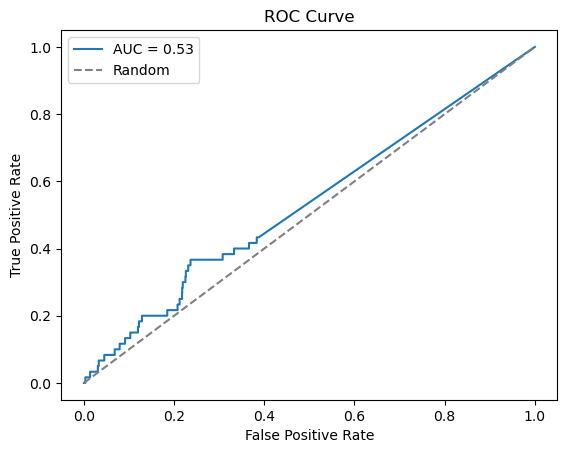

In [95]:
auc_roc = roc_auc_score(y, y_pred_tfidf)
print(f'AUC-ROC: {auc_roc:.3f}')

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.3
y_binary = [1 if i >= threshold else 0 for i in y_pred_tfidf]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_tfidf)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Word2Vec

In [63]:
auc_roc = roc_auc_score(y, y_pred)
print(f'AUC-ROC: {auc_roc:.2f}')

AUC-ROC: 0.4914957339878448


Precision: 0.01059135039717564
Recall: 1.0
F1 Score: 0.02096069868995633


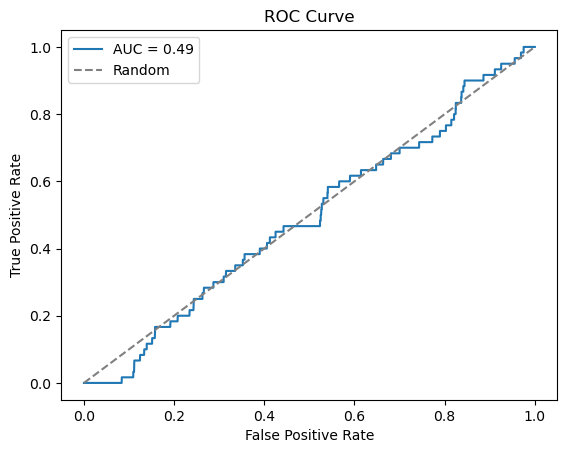

In [64]:
# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_binary = [1 if i >= threshold else 0 for i in y_pred]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### FastText

AUC-ROC: 0.46708742402992054
Precision: 0.010323159784560144
Recall: 0.7666666666666667
F1 Score: 0.02037201062887511


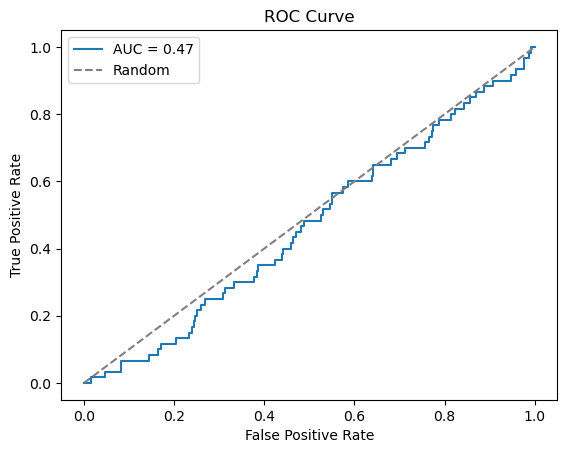

In [66]:
auc_roc = roc_auc_score(y, y_pred_ft)
print(f'AUC-ROC: {auc_roc:.2f}')

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_binary = [1 if i >= threshold else 0 for i in y_pred_ft]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_ft)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Dostoevsky+BERT

AUC-ROC: 0.455
Precision: 0.007
Recall: 0.233
F1 Score: 0.013


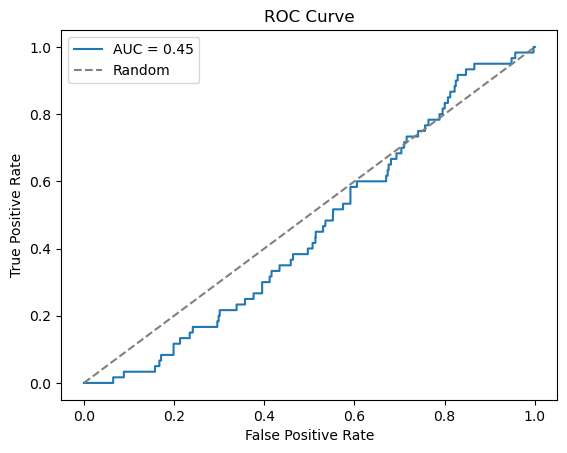

In [81]:
auc_roc = roc_auc_score(y, y_pred_dt)
print(f'AUC-ROC: {auc_roc:.3f}')

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_binary = [1 if i >= threshold else 0 for i in y_pred_dt]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_dt)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Будем оценивать качество моделей по 4 метрикам:
1. Площадь под кривой ROC
2. Точность (Precision)
3. Полнота (Recall)
4. F1-мера

Реузультаты представлены в таблице

In [91]:
vocab = {'auc_roc': [0.533, 0.491, 0.467, 0.455],
         'precision': [0.021, 0.011, 0.010, 0.007],
         'recall': [0.067, 1.000, 0.767, 0.233],
         'f1_score': [0.031, 0.021, 0.020, 0.013]}

compare_df = pd.DataFrame(vocab, index=['tf-idf', 'word2vec', 'fasttext', 'dostoevsky+rubert'])
#compare_df.columns.name = 'метрики'
#compare_df.index.name = 'модели'
compare_df

,auc_roc,precision,recall,f1_score
tf-idf,0.533,0.021,0.067,0.031
word2vec,0.491,0.011,1.000,0.021
fasttext,0.467,0.010,0.767,0.020
dostoevsky+rubert,0.455,0.007,0.233,0.013


## Кластеризация

## K-means and GMM

In [236]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [237]:
X = np.array(embeddings_w2v)

TSNE для визуализации

In [238]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [239]:
X_tsne

array([[-29.347088,  -9.853154],
       [ -9.032245, -20.663198],
       [-62.647778, -15.136909],
       ...,
       [ 67.408615,  -5.955772],
       [-10.38167 ,   0.714559],
       [ 10.860157,   4.025878]], dtype=float32)

кластеризация с GMM

In [242]:
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=43)
labels_gmm = gmm.fit_predict(X)

In [243]:
df_tsne_gmm = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne_gmm['cluster_gmm'] = labels_gmm

In [250]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

In [251]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne['cluster_kmeans'] = labels_kmeans

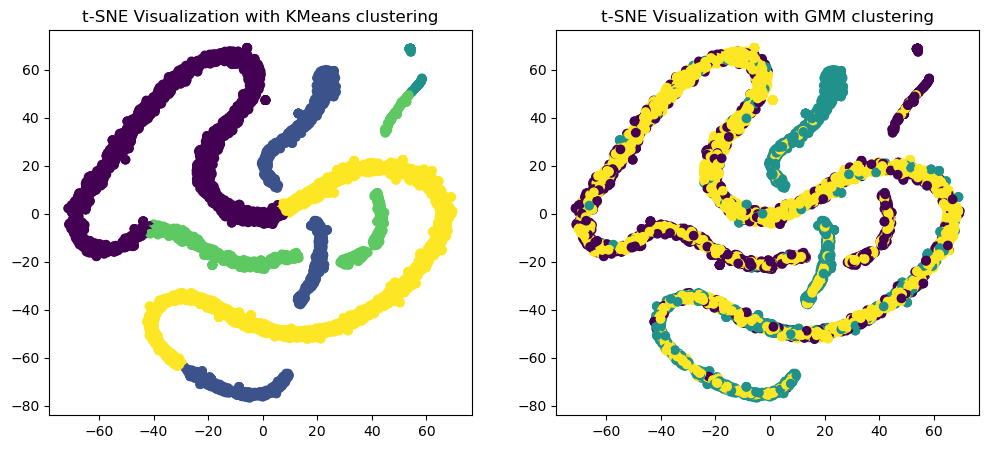

In [263]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df_tsne['tsne_1'], df_tsne['tsne_2'], c=df_tsne['cluster_kmeans'], cmap='viridis')
ax1.set_title('t-SNE Visualization with KMeans clustering')

ax2.scatter(df_tsne_gmm['tsne_1'], df_tsne_gmm['tsne_2'], c=df_tsne_gmm['cluster_gmm'], cmap='viridis')
ax2.set_title('t-SNE Visualization with GMM clustering')
plt.show()

## FastText

In [273]:
X_ft = np.array(embeddings_ft)


In [274]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne_ft = tsne.fit_transform(X_ft)

/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [275]:
X_tsne_ft

array([[ 10.084396 ,  17.990467 ],
       [  7.2291307,  25.110794 ],
       [ 19.18576  ,   3.603309 ],
       ...,
       [-29.010881 ,  31.223106 ],
       [ 11.206511 ,  -7.659853 ],
       [-10.545211 ,  12.01351  ]], dtype=float32)

In [284]:
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=43)
labels_gmm_ft = gmm.fit_predict(X_ft)

In [285]:
df_tsne_gmm_ft = pd.DataFrame(X_tsne_ft, columns=['tsne_1', 'tsne_2'])
df_tsne_gmm_ft['cluster_gmm'] = labels_gmm_ft

In [286]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans_ft = kmeans.fit_predict(X_ft)

In [288]:
df_tsne_ft = pd.DataFrame(X_tsne_ft, columns=['tsne_1', 'tsne_2'])
df_tsne_ft['cluster_kmeans'] = labels_kmeans_ft

In [297]:
list(df_tsne_ft["cluster_kmeans"])

[1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 3,
 1,
 2,
 1,
 3,
 0,
 3,
 4,
 0,
 3,
 0,
 4,
 1,
 0,
 1,
 0,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 3,
 3,
 3,
 0,
 3,
 1,
 3,
 2,
 0,
 4,
 0,
 0,
 3,
 3,
 3,
 4,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 4,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 3,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 0,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 3,
 0,
 1,
 3,
 2,
 3,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 3,
 3,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 0,
 3,
 2,
 1,
 3,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 3,
 0,
 1,
 3,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 4,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 0,
 0,
 1,
 1,
 1,
 1,
 3,


In [300]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for i in range(n_components):
    ax1.scatter(df_tsne_ft[df_tsne_ft['cluster_kmeans']==i]['tsne_1'], df_tsne_ft[df_tsne_ft['cluster_kmeans']==i['tsne_2'], c=df_tsne_ft['cluster_kmeans'], label=f'class={i}', cmap='viridis')
ax1.set_title('t-SNE Visualization with KMeans clustering')
ax1.legend()

ax2.scatter(df_tsne_gmm_ft['tsne_1'], df_tsne_gmm_ft['tsne_2'], c=df_tsne_gmm_ft['cluster_gmm'], cmap='viridis')
ax2.set_title('t-SNE Visualization with GMM clustering')
ax2.legend()
plt.show()

SyntaxError: invalid syntax (226071130.py, line 3)

In [205]:
def plot_tsne(class_number, result, class_pred):
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    X_embedded = TSNE(n_components=2, random_state=0, learning_rate='auto',  init='random', perplexity=5).fit_transform(result)
    colors = ['r', 'b', 'g', 'y','k']
    for i in range(class_number):
        ax.scatter(X_embedded[class_pred==i][:,0], X_embedded[class_pred==i][:,1], c=colors[i], label=f'class = {i}')
    #plt.scatter(X_embedded[pred==0][:,0], X_embedded[pred==0][:,1])
    ax.legend()
    return ax, fig, X_embedded